In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

from bilby.core.prior import (
    ConditionalPowerLaw,
    ConditionalPriorDict,
    Constraint,
    Cosine,
    Gaussian,
    LogNormal,
    PowerLaw,
    PriorDict,
    Sine,
    Uniform,
)

from bilby.gw.prior import UniformComovingVolume, UniformSourceFrame

from typing import TYPE_CHECKING, Optional, Union

msun = r"$M_{\odot}$"
mpc = "Mpc"
rad = "rad"

#from astropy.cosmology import Cosmology

In [3]:
#import bilby



def uniform_extrinsic() -> PriorDict:
    prior = PriorDict()
    prior["dec"] = Cosine()
    prior["ra"] = Uniform(0, 2 * np.pi)
    prior["theta_jn"] = Sine()
    prior["phase"] = Uniform(0, 2 * np.pi)
    return prior

def nonspin_bns() -> PriorDict:
    prior = uniform_extrinsic()
    prior["mass_1"] = Uniform(5, 100, unit=msun)
    prior["mass_2"] = Uniform(5, 100, unit=msun)
    prior["mass_ratio"] = Constraint(0, 1)
    prior["redshift"] = UniformSourceFrame(
        0, 0.5, name="redshift", cosmology=None
    )
    prior["psi"] = 0
    prior["a_1"] = 0
    prior["a_2"] = 0
    prior["tilt_1"] = 0
    prior["tilt_2"] = 0
    prior["phi_12"] = 0
    prior["phi_jl"] = 0

    detector_frame_prior = True
    return prior, detector_frame_prior

In [8]:
prior = PriorDict()
prior["mass_1"] = Uniform(5, 100, unit=msun)

In [9]:
p, _ = nonspin_bns()

In [10]:
p.sample()

{'dec': -0.3853466362477794,
 'ra': 3.8700263610845944,
 'theta_jn': 1.8138118317038938,
 'phase': 1.1940035032279814,
 'mass_1': 83.26164643369984,
 'mass_2': 36.07663029578498,
 'redshift': 0.4227996614290291,
 'psi': 0.0,
 'a_1': 0.0,
 'a_2': 0.0,
 'tilt_1': 0.0,
 'tilt_2': 0.0,
 'phi_12': 0.0,
 'phi_jl': 0.0}

In [46]:
#alpha value to be used for power law priors
powerlaw_alpha = -3.0

#prior functions to use for component masses.
mass1prior = Uniform
mass2prior = Uniform

mass1_min = 1.0
mass1_max = 3.0

mass2_min = 1.0
mass2_max = 3.0

#prior functions to use for spins. 
spin1zprior = Uniform
spin2zprior = Uniform

spin1z_min = 0.0
spin1z_max = 0.0

spin2z_min = 0.0
spin2z_max = 0.0

#prior functions to use for right ascension and declination.
#RA and DEC take ranges 0 <= x <= 1, and are transformed to their proper ranges.

ra_prior = Uniform #RA should always be uniform
dec_prior = Cosine

ra_min = 0.0
ra_max = 1.0

dec_min = 0.0
dec_max = 1.0

#prior function for distance. Should be either Uniform or UniformComovingVolume.

d_prior = UniformComovingVolume

d_min = 0.0
d_max = 1000

In [47]:
def constructPrior(
    prior: Union[Uniform, Cosine, UniformComovingVolume,PowerLaw], 
    min: float, 
    max: float,
    **kwargs
) -> PriorDict:
    #generic constructor for bilby priors. 
    
    if prior == PowerLaw:
        kwargs['alpha'] = powerlaw_alpha

    if max <= min:
        return max
    else:
        return prior(minimum = min, maximum = max, **kwargs)

In [48]:
constructPrior(PowerLaw,mass1_min, mass1_max)

PowerLaw(alpha=-3.0, minimum=1.0, maximum=3.0, name=None, latex_label=None, unit=None, boundary=None)

In [28]:
prior = PriorDict()

prior['mass1'] = PowerLaw(-2.0,mass1_min,mass1_max)

(array([226., 196., 111., 105.,  76.,  73.,  60.,  58.,  55.,  40.]),
 array([1.00027423, 1.20015072, 1.40002721, 1.5999037 , 1.79978018,
        1.99965667, 2.19953316, 2.39940965, 2.59928613, 2.79916262,
        2.99903911]),
 <BarContainer object of 10 artists>)

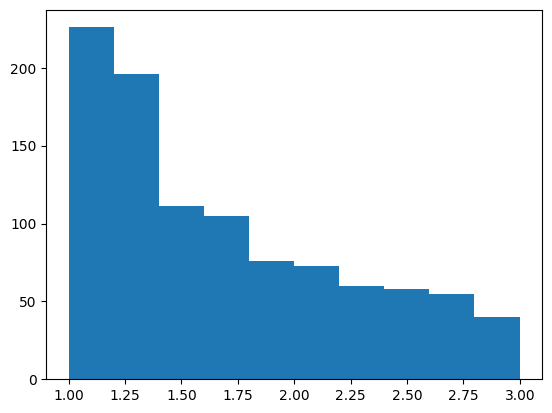

In [29]:
plt.hist(prior['mass1'].sample(1000))

In [14]:
#intrinsic prior

prior = PriorDict()

prior['mass1'] = constructPrior(mass1prior, mass1_min, mass1_max)
prior['mass2'] = constructPrior(mass2prior, mass2_min, mass2_max)
prior['spin1z'] = constructPrior(spin1zprior, spin1z_min, spin1z_max)
prior['spin2z'] = constructPrior(spin2zprior, spin2z_min, spin2z_max)

TypeError: __init__() missing 1 required positional argument: 'maximum'

In [19]:
import astropy
import bilby
import astropy.coordinates

In [20]:
p = bilby.gw.prior.BBHPriorDict()

print(p)

20:50 bilby INFO    : No prior given, using default BBH priors in /home/alistair.mcleod/mldatafind/datafind_env/lib/python3.9/site-packages/bilby/gw/prior_files/precessing_spins_bbh.prior.


AttributeError: module 'astropy.coordinates' has no attribute 'representation'

In [31]:
#extrinsic prior

prior = PriorDict()

prior['ra'] = constructPrior(Uniform, ra_min * 2 * np.pi, ra_max * 2 * np.pi, boundary = 'periodic')
prior['dec'] = constructPrior(dec_prior, np.pi * ra_min - np.pi/2, np.pi * ra_max - np.pi/2)

prior['d'] = constructPrior(d_prior, d_min, d_max, name = 'luminosity_distance')


(array([  45.,  137.,  297.,  509.,  696.,  995., 1239., 1627., 1922.,
        2382., 2595., 3154., 3498., 3947., 4470., 4964., 5445., 6026.,
        6365., 6945., 7534., 8012., 8623., 9091., 9482.]),
 array([ 27.76016539,  66.64951975, 105.53887411, 144.42822846,
        183.31758282, 222.20693718, 261.09629154, 299.9856459 ,
        338.87500026, 377.76435462, 416.65370898, 455.54306334,
        494.4324177 , 533.32177206, 572.21112642, 611.10048078,
        649.98983514, 688.8791895 , 727.76854386, 766.65789822,
        805.54725258, 844.43660694, 883.3259613 , 922.21531566,
        961.10467002, 999.99402438]),
 <BarContainer object of 25 artists>)

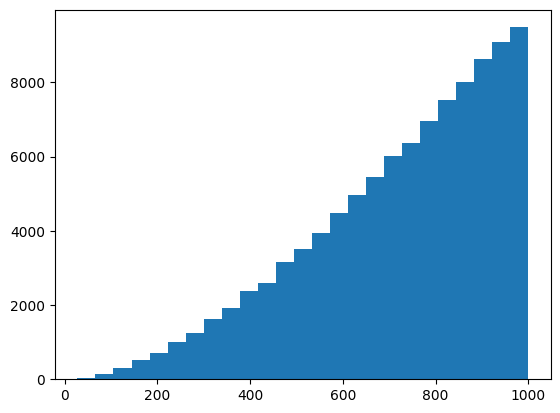

In [33]:
x = prior.sample(100000)

plt.hist(x['d'],bins=25)

In [12]:
x = prior.sample(10)

for i in range(len(x['mass1'])):
    if x['mass1'][i] < x['mass2'][i]:
        x['mass2'][i], x['mass1'][i] = x['mass1'][i], x['mass2'][i]


KeyError: 'mass1'

In [ ]:
#from colab notebook

prior = PriorDict()

prior['mass_1'] = 10.0
prior['mass_2'] = 10.0
#prior['chirp_mass'] = 8.70551
#prior['mass_ratio'] = 1.0
prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
#prior['geocent_time'] = Uniform(name="geocent_time", minimum=1187008882.4-0.1, maximum=1187008882.4+0.1)
prior['geocent_time'] = 1187008882.4
prior['a_1'] =  0.0
prior['a_2'] =  0.0
prior['tilt_1'] =  0.0
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.0
prior['phi_jl'] =  0.0
#prior['dec'] =  Uniform(name="dec", minimum=-np.pi/2,maximum=np.pi/2)
prior['dec'] =  Cosine(name="dec", minimum = -np.pi/2,maximum = np.pi/2)
prior['ra'] = Uniform(name="ra", minimum=0,maximum=2*np.pi, boundary= 'periodic')
prior['theta_jn'] =  0
prior['psi'] =  0
prior['luminosity_distance'] = 100

In [ ]:
snrs[det] = sigma(htilde=scale_factor*detector_signals[det],
                psd=psds[det],
                low_frequency_cutoff=f_lower)

# GENERATING TEMPLATE BANKS

In [6]:
from pycbc.waveform import get_td_waveform
import multiprocessing as mp
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [49]:
import csv

In [50]:
templates = []
bank_file = open('configs/params.txt','r')
csvFile = csv.reader(bank_file)

for lines in csvFile:
    templates.append([float(i) for i in lines])

templates = np.array(templates)

In [77]:
templates = np.load("configs/GSTLal_templates.npy")

In [ ]:
import os

In [115]:
#directory of all GWSamplegen template banks
main_dir = "/home/alistair.mcleod/GWSamplegen/template_banks/"


#name of template bank directory
bank_dir = "test"

#check if directory exists
if not os.path.exists(main_dir+bank_dir):
    os.mkdir(main_dir+bank_dir)

#priors of the template bank

mass1_min = 1.0
mass1_max = 1.1

mass2_min = 1.0
mass2_max = 1.1

spin1z_min = -1.0
spin1z_max = 1.0

spin2z_min = -1.0
spin2z_max = 1.0

q_min = 0.1
q_max = 1.0


#arguments for waveform generator

approximant = "SpinTaylorT4"
f_lower = 20.0
delta_t = 1/2048

#templates are stored in the form: chirp mass, mass 1, mass 2, spin 1z, spin 2z
templates = np.load("configs/GSTLal_templates.npy")

#select only templates that are within the specified range

templates = templates[(templates[:,1] >= mass1_min) & (templates[:,1] <= mass1_max) & (templates[:,2] >= mass2_min) & 
    (templates[:,2] <= mass2_max) & (templates[:,3] >= spin1z_min) & (templates[:,3] <= spin1z_max) & 
    (templates[:,4] >= spin2z_min) & (templates[:,4] <= spin2z_max) & (templates[:,2]/templates[:,1] >= q_min) & 
    (templates[:,2]/templates[:,1] <= q_max)]

#sort the templates by chrirp mass
templates = templates[templates[:,0].argsort()]

#save the templates for future reference

print(len(templates))
#np.save(main_dir+bank_dir+"/params.npy",templates)


2937


In [107]:
args = {"approximant":approximant,"f_lower":f_lower,"delta_t":delta_t}

In [109]:
#store priors and waveform generation arguments in a dictionary

args = {'approximant': approximant,'f_lower': f_lower,'delta_t': delta_t, 
        'mass1_min': mass1_min,'mass1_max': mass1_max,'mass2_min': mass2_min,'mass2_max': mass2_max,
        'spin1z_min': spin1z_min,'spin1z_max': spin1z_max,'spin2z_min': spin2z_min,'spin2z_max': spin2z_max,
        'q_min': q_min,'q_max': q_max}



In [113]:
#save args to a json file
import json

with open(main_dir+bank_dir+"/args.json", 'w') as fp:
    json.dump(args, fp, sort_keys=False, indent=4)



In [96]:
print(templates.shape)

(651057, 5)


In [12]:
param_list = templates[:1000,1:3]

In [13]:
print(param_list)

[[1.0012846 1.0005911]
 [1.0042679 1.0010313]
 [1.0057804 1.0000049]
 ...
 [1.0382029 1.0185206]
 [1.0567303 1.0008616]
 [1.0421759 1.0147328]]


In [14]:
templates = param_list

In [25]:
#generate gravitational wave signals using multiprocessing

templates_per_file = 100

def get_fd_waveform_mp(args):
    hp, _ = get_td_waveform(mass1 = args[0], mass2 = args[1],
            approximant = "SpinTaylorT4", f_lower = 20, delta_t = 1/2048)
    hp = hp.to_frequencyseries()
    return hp

for j in range(int(np.ceil(len(templates)/100))):

    #handle the case of templates not being divisible by 10
    if j == len(templates)//templates_per_file:
        param_list = templates[j*templates_per_file:,:]
    else:
        param_list = templates[j*templates_per_file:(j+1)*templates_per_file,:]

    print(param_list)


    with mp.Pool(processes = 20) as pool:
        waveforms = pool.map(get_fd_waveform_mp, param_list)

        f = h5py.File("template_banks/test/"+str(j*templates_per_file)+".hdf5",'w')
        for i in range(len(waveforms)):
            f.create_dataset(str(i), data = np.abs(waveforms[i]))

        f.close()

[[2.1350735 1.3094461]
 [2.0005513 1.3901852]
 [2.6551613 1.081971 ]
 [2.7307039 1.0567511]
 [2.8775529 1.011731 ]
 [2.7554075 1.0488239]
 [2.4882439 1.1436239]
 [2.3118359 1.2194166]
 [2.3757266 1.1905344]
 [2.5463001 1.1212087]
 [2.2973163 1.2262502]
 [2.7107533 1.0632965]
 [2.7389237 1.0541345]
 [2.8873383 1.0089398]
 [2.3786513 1.1892922]
 [2.2505841 1.2488815]
 [2.5977528 1.10227  ]
 [2.4642735 1.1532772]
 [2.2704652 1.2391482]
 [2.8905914 1.0080219]
 [2.8829651 1.0102262]
 [2.8808055 1.0108517]
 [2.5310754 1.12704  ]
 [2.5861799 1.1064879]
 [2.7966259 1.0359914]
 [2.5648362 1.1143413]
 [2.6902655 1.07015  ]
 [2.4930582 1.1418091]
 [2.5167656 1.1325506]
 [2.8759502 1.0122763]
 [2.6808725 1.0733123]
 [2.8369885 1.0237582]
 [2.8668889 1.0149257]
 [2.2244377 1.2620617]
 [2.8168008 1.0298552]
 [2.2182657 1.2652087]
 [2.5229541 1.130193 ]
 [2.4362529 1.1648334]
 [2.6034827 1.1002766]
 [2.3258259 1.2130766]
 [2.1698718 1.2905918]
 [2.258911  1.2448848]
 [2.6837568 1.0723945]
 [2.8059674

In [ ]:
#for a 2.1 GB file, takes ~0.2 seconds per template load
#for a 1.1 GB file, takes ~0.12 seconds per template load
#for a 95 MB file, takes ~0.06 seconds per template load

In [25]:
def get_td_waveform_mp(args):
    hp, _ = get_td_waveform(mass1 = args[0], mass2 = args[1],
            approximant = "SpinTaylorT4", f_lower = 20, delta_t = 1/2048)
    #hp = hp.to_frequencyseries()
    return hp

In [39]:
x = get_fd_waveform_mp(param_list[200])

In [40]:
len(x)

123599

In [33]:
len(x)

120962

In [73]:
chirp_mass = ((param_list[:,0]*param_list[:,1])**(3/5))/((param_list[:,0]+param_list[:,1])**(1/5))

In [71]:
def chirp_mass(m1,m2):
    return ((m1*m2)**(3/5))/((m1+m2)**(1/5))

In [72]:
chirp_mass(2.329243,1.2128739)

1.4479904304743263

In [68]:
chirp_mass(param_list[300][0],param_list[300][1])

2.030727394475278

In [69]:
param_list[300]

array([2.3292431, 1.2128739])

In [65]:
param_list[:,1][300]

1.2128739

In [66]:
chirp_mass[300]

2.030727394475278

In [42]:
param_list[150]

array([2.827095 , 1.0272239])

In [41]:
param_list[200] #long

array([2.0452294, 1.3631185])

In [43]:
param_list[250]

array([2.6187289, 1.095811 ])

In [44]:
param_list[300] #long

array([2.3292431, 1.2128739])

In [5]:
file_index = 1

templates_per_file = 1000


print("template_banks/BNS_nonspin/"+str(file_index*templates_per_file)+".hdf5")

template_banks/BNS_nonspin/1000.hdf5


In [3]:
#function that picks a specific template from a template bank
#templates are spread between multiple files with templates_per_file templates per file

def get_template(template_index, templates_per_file = 100):
    file_index = template_index//templates_per_file
    template_index = template_index%templates_per_file

    f = h5py.File("template_banks/BNS_nonspin/"+str(file_index*templates_per_file)+".hdf5",'r')
    template = f[str(template_index)][:]
    f.close()

    return template

#test
for i in range(0,1000,50):
    print(i)
    template = get_template(i)
    print(len(template))


0
123670
50
123478
100
123469
150
123453
200
123599
250
123456
300
123496
350
123455
400
123335
450
123326
500
123398
550
123290
600
123422
650
123271
700
123186
750
123363
800
123187
850
123131
900
123135
950
123177


In [34]:
print(len(template))

123505


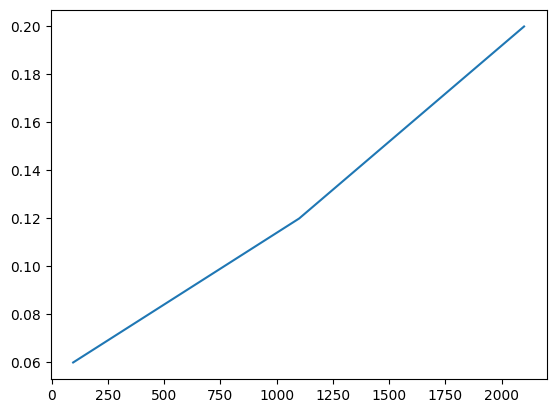

In [18]:
plt.plot([2100,1100,95],[0.2,0.12,0.06])

In [17]:
import matplotlib.pyplot as plt

In [28]:
for i in range(100):
    f = h5py.File("template_banks/BNS_nonspin/400.hdf5",'r')

    x = f[str(i)][()]
    f.close()

In [112]:
f = h5py.File("template_banks/BNS_nonspin/0.hdf5",'r')

for i in range(len(f.keys())):
    print(len(f[str(i)]))

f.close()

287242
286429
286315
286181
286111
286037
286028
286008
285961
285923
285915
285895
285826
285724
285692
285653
285611
285515
285435
285341
285341
285255
285142
285122
285120
285059
285028
285003
284986
284952
284879
284869
284865
284838
284793
284763
284760
284745
284697
284687
284678
284672
284668
284634
284600
284561
284544
284427
284403
284396
284361
284350
284343
284226
284180
284129
284112
284110
284093
284060
284030
284029
284022
284017
284009
283975
283915
283897
283889
283887
283822
283803
283774
283762
283755
283726
283705
283704
283646
283644
283631
283627
283619
283598
283593
283553
283525
283524
283498
283477
283416
283384
283377
283377
283368
283315
283310
283270
283205
283203
283200
283198
283184
283180
283160
283130
283104
283098
283095
283090
283081
283060
283047
283029
283013
282997
282995
282968
282955
282955
282947
282939
282896
282894
282851
282821
282821
282803
282798
282794
282793
282775
282736
282705
282702
282690
282665
282644
282612
282608
282595
282579
282578

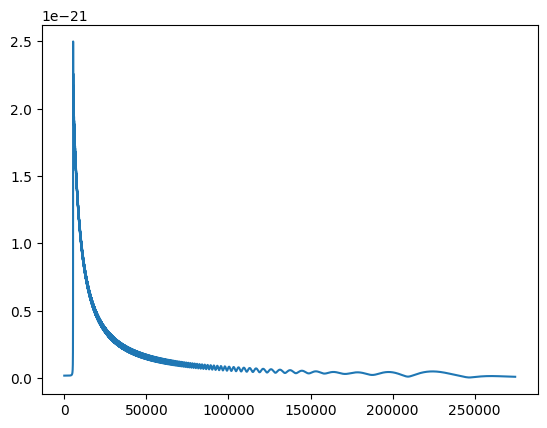

In [111]:
plt.plot(f['999'][()])

In [79]:
import os

os.listdir("template_banks/BNS_nonspin/")

os.remove("template_banks/BNS_nonspin/0.hdf5")
os.remove("template_banks/BNS_nonspin/1.hdf5")
os.remove("template_banks/BNS_nonspin/2.hdf5")